In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn import datasets, manifold

%matplotlib inline

In [2]:
X, y  = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
X =  X.values
y = y.values.astype('int')

In [3]:
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (70000, 784)
Shape of y: (70000,)


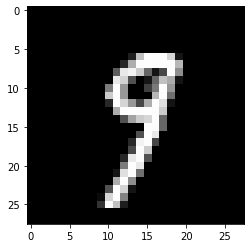

In [4]:
sample_img = X[43, :].reshape(28, 28)
plt.imshow(sample_img, cmap='gray')

In [5]:
tsne = manifold.TSNE(n_components=2, random_state=23)
tsne_output = tsne.fit_transform(X[:4000, :])

In [6]:
tsne_df = pd.DataFrame(np.column_stack((tsne_output, y[:4000])), columns=['x', 'y', 'labels'])
tsne_df

,x,y,labels
0,1.181731,-35.713966,5.0
1,-58.462502,-35.344631,0.0
2,52.193474,-32.739719,4.0
3,18.176483,57.904804,1.0
4,31.534445,-13.297442,9.0
...,...,...,...
3995,-17.742214,-33.733929,3.0
3996,1.939663,29.006966,1.0
3997,-10.437274,-51.911949,3.0
3998,48.262756,-26.544090,9.0


/Users/srisaipraveengadiyaram/opt/anaconda3/envs/appliedML/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


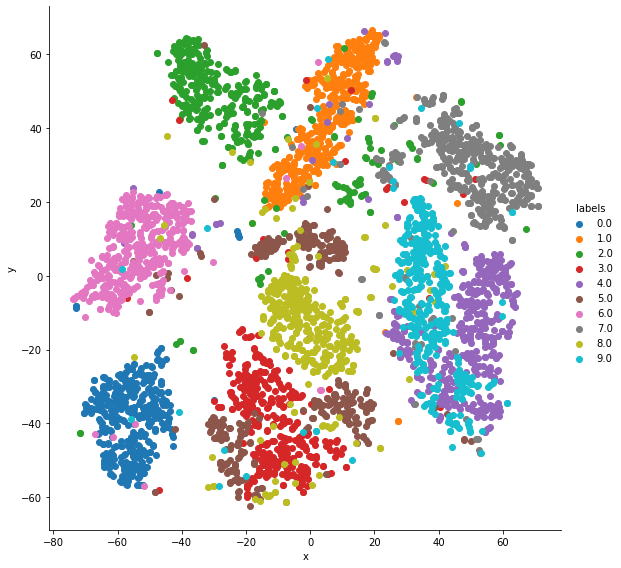

In [7]:
grid = sns.FacetGrid(tsne_df, hue='labels', size=8)
grid.map(plt.scatter, 'x', 'y').add_legend()